# SP23-BAI-050
# SYED AHMAD ALI
# Dataset Name = "Default of Credit Card Clients Dataset"
# Applying Random Forest

## -----------------------------------------------------------------------------

## Importing All the Required Libraries

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

## Giving file path and make it accessible

In [2]:
file_path = './UCI_Credit_Card.csv'
data = pd.read_csv(file_path)

## Print the specific data from the dataset to review the dataset

In [3]:
print(data)
print(data.info())
print(data.describe())
print(data.columns)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

## Calculating the percentage of missing data for each column

"No Handling of missing data bcz there is no any missing data in the data set."

In [4]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default.payment.next.month    0.0
dtype: float64


# Converting the DataSet into a DATAFRAME

# Checking Class Imbalance Issues:

Imbalanced data means the number of data points across a class label is not uniform.

# Output Interpretation:
1- Balanced Dataset: If the counts of each class are roughly equal, your dataset is balanced.

2- Imbalanced Dataset: If one class significantly outnumbers the other, it indicates class imbalance.

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

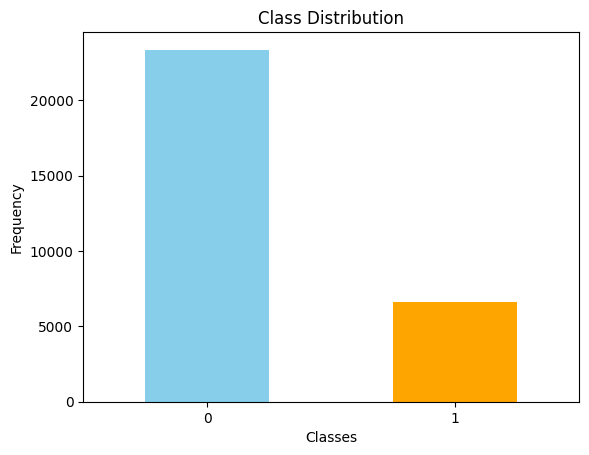

In [5]:
df = pd.DataFrame(data)
print(df)

class_distribution = data['default.payment.next.month'].value_counts()
print(f"Original Class Distribution: {class_distribution}")

class_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Splitting features (X) and target (y)

# Resolution of the class imbalance distribution issue.

# Checking the new class distribution

Class Distribution After SMOTE:
default.payment.next.month
1    23364
0    23364
Name: count, dtype: int64


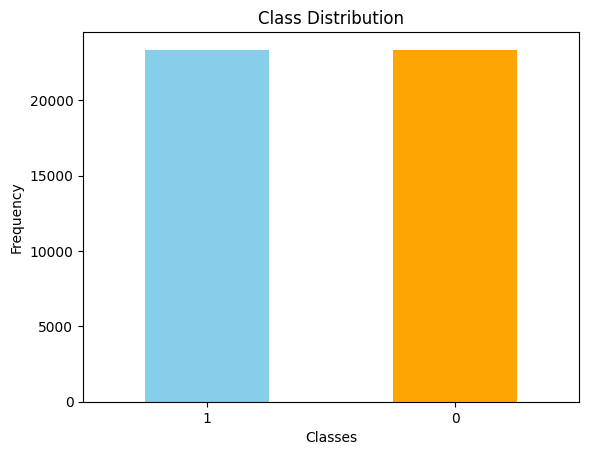

In [6]:
X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

print("Class Distribution After SMOTE:")
print(pd.Series(y_resampled).value_counts())

class_distribution = pd.Series(y_resampled).value_counts()
class_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Applying Train Test Split of Dataset in 80/20 Ratio

# Initialize Parameter Grid for RandomizedSearchCV

# Initialize Random Forest Classifier

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

"Scaling"
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

paramiterGrid = {
    "n_estimators": [50, 100, 150, 200],
    "max_depth": [None, 10, 20, 30, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

randomForest = RandomForestClassifier()

# RandomizedSearchCV

1- Reduced to 50 iterations for quicker training

2- 3 fold cross-validation

3- Enable verbosity

4- Utilize all processors

# Fitting parameters

# Selecting the best parameters found during the RandomizedSearchCV

# Making Predictions

# Calculating the Execution Time

In [8]:
startTime = time.time()

model = RandomizedSearchCV(
    estimator=randomForest,
    param_distributions=paramiterGrid,
    n_iter=50,  
    cv=3,       
    verbose=2,  
    n_jobs=-1,  
    scoring="accuracy"
)

model.fit(X_train, y_train)

bestParameter = model.best_estimator_

y_pred = bestParameter.predict(X_test)

endTime = time.time()
executionTime = endTime - startTime
hours = int(executionTime // 3600)
minutes = int((executionTime % 3600) // 60)
seconds = executionTime % 60

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   7.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   7.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   7.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   8.1s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  19.7s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  19.8s
[CV] END bo

# Print the results

In [9]:
print(f"\nBest Parameters Found: {bestParameter}")
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nAccuracy Score: {accuracy:.2f}")
print(f"Execution Time: {hours} hours, {minutes} minutes, {seconds:.2f} seconds")


Best Parameters Found: RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30,
                       max_features='log2', n_estimators=150)

Confusion Matrix:
[[4111  553]
 [ 790 3892]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4664
           1       0.88      0.83      0.85      4682

    accuracy                           0.86      9346
   macro avg       0.86      0.86      0.86      9346
weighted avg       0.86      0.86      0.86      9346


Accuracy Score: 0.86
Execution Time: 0 hours, 8 minutes, 20.95 seconds


# Displaying the Confusion Matrix

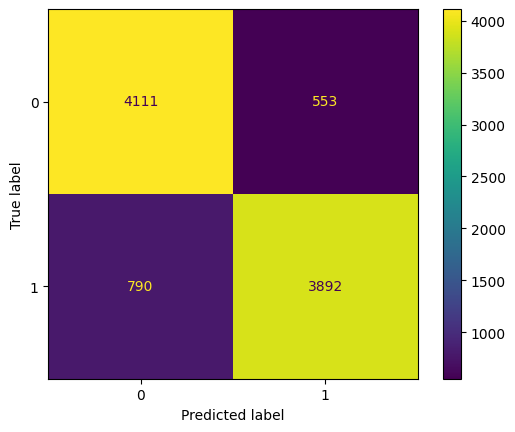

In [10]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
disp.plot()

# Ploting the Bar Chart for the Precision, Recall, F1-Score, Accuracy

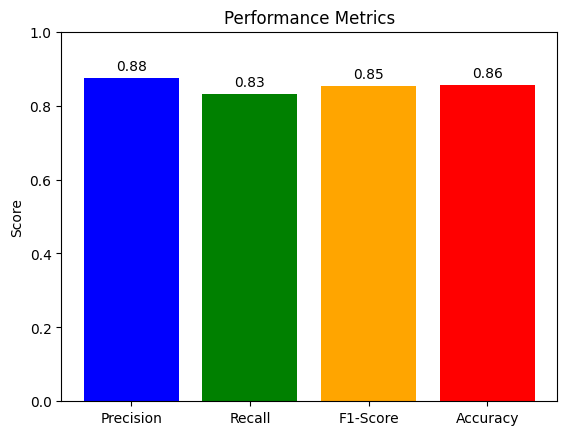

In [11]:
classification_report_dict = classification_report(y_test, y_pred, output_dict=True)
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']

metric_values = [precision, recall, f1_score, accuracy]

plt.bar(metrics, metric_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
for i, v in enumerate(metric_values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()